# Data Cleaning and Preprocessing

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-and-loading-datasets" data-toc-modified-id="Importing-and-loading-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing and loading datasets</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Merging-Products,-Inventory-and-Transaction-datasets" data-toc-modified-id="Merging-Products,-Inventory-and-Transaction-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merging Products, Inventory and Transaction datasets</a></span></li></ul></div>

In [2]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and loading datasets

In [6]:
# Loading datasets
df_inventory = pd.read_parquet("Data/inventory.parquet", engine='pyarrow').drop_duplicates()
df_inventory

,product_id,color,week,year,end_stock
0,5013503333822849619,283625591240665315,26,2018,467
1,5013503333822849619,283625591240665315,35,2018,83
2,5013503333822849619,283625591240665315,37,2018,74
3,5013503333822849619,283625591240665315,28,2018,306
4,5013503333822849619,283625591240665315,25,2018,570
...,...,...,...,...,...
53310,3737074499454004393,-1096657961024481281,43,2018,-1
53311,6472937453776242465,4434392649980897134,35,2019,-1
53312,6472937453776242465,4434392649980897134,37,2019,-1
53313,6472937453776242465,4434392649980897134,36,2019,-1


In [7]:
# Loading datasets
df_products = pd.read_parquet("Data/products.parquet", engine='pyarrow').drop_duplicates()
df_products

,product_id,color,season,group1,group2,group3,group4,supplier,price
0,-6621880525488637999,-2483913058010357297,-4346186392884307318,441269149817291623,-7584397099425324432,-3541297049376649409,-6020411590809505277,3171477330005505624,216.845
1,14190788625669565,4434392649980897134,3491427925562683735,441269149817291623,-7584397099425324432,-3541297049376649409,-6020411590809505277,8722431877125984442,123.845
2,849715851629411931,-3276860047156397651,3491427925562683735,441269149817291623,-7584397099425324432,-3541297049376649409,-6020411590809505277,8722431877125984442,123.845
3,3436430783673813301,-8748599053784688418,3491427925562683735,441269149817291623,-7584397099425324432,-3541297049376649409,-6020411590809505277,-3148162588191077468,123.845
4,3292933288910895816,6300285248995692704,-6688484356025422569,441269149817291623,-7584397099425324432,-3541297049376649409,-6020411590809505277,8570611468865486509,123.845
...,...,...,...,...,...,...,...,...,...
3719,5225622763832425378,-2483913058010357297,-8805101207338359955,-1649647114326602172,-4514814501078713314,5270884283221720855,-5181468243405807313,-1218806477207494940,139.345
3720,4433527649207899475,1727989995047069106,-8805101207338359955,-1649647114326602172,-4514814501078713314,5270884283221720855,-5181468243405807313,794668319850531012,154.845
3721,853851135491988708,-563894121835923691,-6688484356025422569,-1649647114326602172,-4514814501078713314,5270884283221720855,-5181468243405807313,5403234859270169398,139.345
3722,8604137261642930349,2495561662816265577,5248912350442593374,3038649692277503723,-8575992826998158315,3346951472695609643,-7589239156895068507,-3148162588191077468,108.345


In [8]:
# Loading datasets
df_transactions = pd.read_parquet("Data/transactions.parquet", engine='pyarrow').drop_duplicates()
df_transactions

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4105354327471602248,2018-06-27,3467808910252980446,7525294017379291570,-1,-61.969,-54.777,13.764
1,-8459771247945103597,2018-12-08,7882036791362583433,-1087308299640637187,1,105.369,105.369,21.111
2,3140884063370080095,2018-06-25,620304035796765794,4635203013712690446,1,124.000,124.000,2.511
3,8293948971244798043,2018-05-24,5882285843404558116,331572785345181726,1,37.200,30.318,16.368
4,-382551574841157382,2019-06-29,3467808910252980446,4394904580267056438,-1,-74.400,-74.400,-40.796
...,...,...,...,...,...,...,...,...
1219269,8207824248163210119,2018-05-01,2584791526471596845,-5838116997233039643,1,15.500,13.950,46.779
1219270,5570147345658107985,2018-04-29,7594814217390127793,-778222945424499318,1,15.500,15.500,21.390
1219271,3712099257107244381,2018-04-28,6850805149468359632,-778222945424499318,1,15.500,10.850,21.390
1219272,577347547453849473,2018-04-28,2584791526471596845,-5838116997233039643,1,15.500,15.500,46.779


## Data preprocessing

In [9]:
# Checking for missing values
print("Inventory: \n",
      df_inventory.isnull().mean(), "\n \n", "Products: \n",
      df_inventory.isnull().mean(), "\n \n", "Transactions: \n",
      df_transactions.isnull().mean())

Inventory: 
 product_id    0.0
color         0.0
week          0.0
year          0.0
end_stock     0.0
dtype: float64 
 
 Products: 
 product_id    0.0
color         0.0
week          0.0
year          0.0
end_stock     0.0
dtype: float64 
 
 Transactions: 
 transaction_id    0.0
date              0.0
shop              0.0
product_id        0.0
quantity          0.0
price             0.0
price_paid        0.0
purchase_price    0.0
dtype: float64


The inventory DataFrame has a column named "week" that represents the week of the year (1 to 52) and a column named "year" that represents the year (2018 or 2019). Here, we refine the week values in the DataFrame in a way that also incorporates information about the year. The same is done for transaction DataFrame.

In [10]:
df_inventory.loc[df_inventory["year"] == 2019, "week"] = df_inventory["week"] + 52 
df_inventory.loc[df_inventory["year"] == 2018, "week"] = df_inventory["week"]  
df_inventory = df_inventory.drop('year', axis=1).drop_duplicates()
df_inventory

,product_id,color,week,end_stock
0,5013503333822849619,283625591240665315,26,467
1,5013503333822849619,283625591240665315,35,83
2,5013503333822849619,283625591240665315,37,74
3,5013503333822849619,283625591240665315,28,306
4,5013503333822849619,283625591240665315,25,570
...,...,...,...,...
53310,3737074499454004393,-1096657961024481281,43,-1
53311,6472937453776242465,4434392649980897134,87,-1
53312,6472937453776242465,4434392649980897134,89,-1
53313,6472937453776242465,4434392649980897134,88,-1


In [11]:
#Adjusting timestamps to week
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_transactions['date_week'] = df_transactions['date'].dt.week
df_transactions['date_year'] = df_transactions['date'].dt.year
df_transactions.loc[df_transactions["date_year"] == 2019, "week"] = df_transactions["date_week"] + 52 
df_transactions.loc[df_transactions["date_year"] == 2018, "week"] = df_transactions["date_week"]   
df_transactions = df_transactions.drop('date_year', axis=1)
df_transactions = df_transactions.drop('date_week', axis=1)
df_transactions = df_transactions.drop('date', axis=1).drop_duplicates()
df_transactions

<ipython-input-11-fc944a8faaf0>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_transactions['date_week'] = df_transactions['date'].dt.week


,transaction_id,shop,product_id,quantity,price,price_paid,purchase_price,week
0,-4105354327471602248,3467808910252980446,7525294017379291570,-1,-61.969,-54.777,13.764,26.0
1,-8459771247945103597,7882036791362583433,-1087308299640637187,1,105.369,105.369,21.111,49.0
2,3140884063370080095,620304035796765794,4635203013712690446,1,124.000,124.000,2.511,26.0
3,8293948971244798043,5882285843404558116,331572785345181726,1,37.200,30.318,16.368,21.0
4,-382551574841157382,3467808910252980446,4394904580267056438,-1,-74.400,-74.400,-40.796,78.0
...,...,...,...,...,...,...,...,...
1219269,8207824248163210119,2584791526471596845,-5838116997233039643,1,15.500,13.950,46.779,18.0
1219270,5570147345658107985,7594814217390127793,-778222945424499318,1,15.500,15.500,21.390,17.0
1219271,3712099257107244381,6850805149468359632,-778222945424499318,1,15.500,10.850,21.390,17.0
1219272,577347547453849473,2584791526471596845,-5838116997233039643,1,15.500,15.500,46.779,17.0


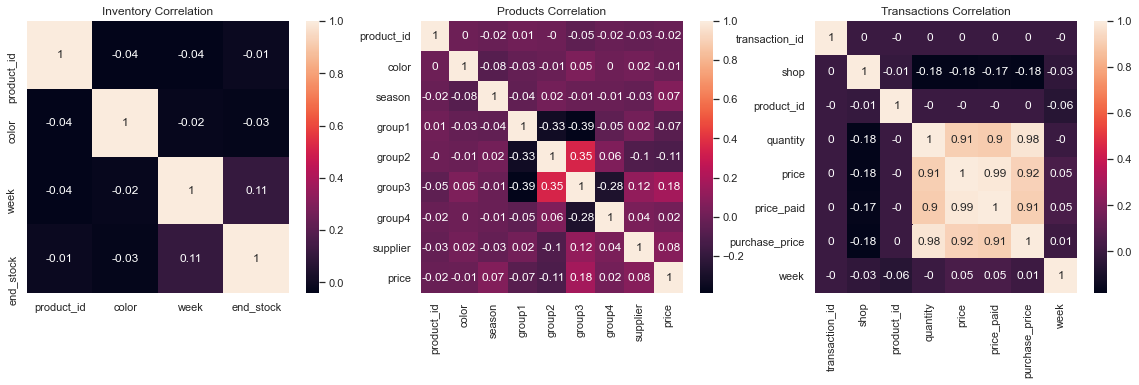

In [19]:
### Correlation Matrix for checking correlation between features in each dataset

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.set(font_scale = 1)
corrMatrix = round(df_inventory.corr(),2)
sns.heatmap(corrMatrix, annot=True, ax=ax[0])
ax[0].set_title("Inventory Correlation")

sns.set(font_scale = 1)
corrMatrix = round(df_products.corr(),2)
sns.heatmap(corrMatrix, annot=True, ax=ax[1])
ax[1].set_title("Products Correlation")

sns.set(font_scale = 1)
corrMatrix = round(df_transactions.corr(),2)
sns.heatmap(corrMatrix, annot=True, ax=ax[2])
ax[2].set_title("Transactions Correlation")

plt.show()


Upon inspection of the correlation matrix, it becomes evident that some features exhibit a high degree of similarity. Despite this apparent redundancy, we choose to explore deeper and explore the underlying patterns between these features, rather than eliminating them at this stage.

In [14]:
#number of uniqus values in each column
print('Products:\n')
print(df_inventory.nunique())
print('\nInventory:\n')
print(df_products.nunique())
print('\nTransactions:\n')
print(df_transactions.nunique())

Products:

product_id     744
color          193
week           104
end_stock     1754
dtype: int64

Inventory:

product_id    2399
color          425
season          33
group1          55
group2          18
group3           7
group4           7
supplier       109
price           35
dtype: int64

Transactions:

transaction_id    881424
shop                 120
product_id           488
quantity               2
price                593
price_paid          8846
purchase_price       968
week                 104
dtype: int64


The group3 and group4 feature have the same nubmer of uniques values so we try to analyse them further

In [20]:
#We check for any existing correlation between "group3" and "group4" column in products dataset as the number of unique values match
df_products.groupby(["group3","group4"]).size()

group3                group4              
-8882343339980856664   5841587257240789264     121
-7565468811988388014  -2085969563176534754      85
-7276710408024991583  -1399611604932492320      10
-6804382118854062123  -6454124772752145674     147
-3541297049376649409  -6020411590809505277    2073
 3346951472695609643  -7589239156895068507     180
 5270884283221720855  -5181468243405807313     755
dtype: int64

Due to observed result, the "group3" and "group4" columns point to one feature and thus one can be eliminated without loss of information.

In [21]:
# Drop "group4" feature from the products dataset
df_products = df_products.drop( ['group4'], axis = 1).drop_duplicates()

In [36]:
# Exporting the modified dataframes for future uses
df_inventory.to_csv('Data\df_inventory_modified.csv')
df_transactions.to_csv('Data\df_transactions_modified.csv')
df_products.to_csv('Data\df_products_modified.csv')

## Merging Products, Inventory and Transaction datasets

Utilization of the feature "color" in the merging process of the product dataframe with the transaction dataframe can result in **data leakage**, as the feature "color" is not present in the transaction dataframe. To mitigate this issue and still utilize information pertaining to the "color" feature, an auxiliary feature, referred to as "color count", is introduced. The "color count" feature represents the number of unique colors per product_id in the inventory dataframe.

In [22]:
df_products_color_count = df_products.groupby(['product_id', 'season', 'group1', 'group2', 'group3', 'supplier', 'price']).count().reset_index()
df_products_color_count = df_products_color_count.rename(columns={'color':'color_count'})
df_products_color_count

,product_id,season,group1,group2,group3,supplier,price,color_count
0,-9216475364954714418,7203907517281793976,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,123.845,1
1,-9205751928885466644,2726517402529609562,-2150450016076468564,6649237188143120813,-7565468811988388014,-2948017505948333945,154.969,1
2,-9180881184394155519,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,3662553265381468556,108.345,1
3,-9166441035473082949,381364961671013394,-7852615573256608079,-941078234227893370,-3541297049376649409,-4680930243447952385,123.969,1
4,-9153756421988907104,-2206134236496969254,1332693253436826002,3360886942916419621,5270884283221720855,-7207051096286461853,108.469,2
...,...,...,...,...,...,...,...,...
2394,9155201191143534453,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,8722431877125984442,92.845,1
2395,9175672346439027102,2968170477890648179,-5767219495226239763,-941078234227893370,-3541297049376649409,-4680930243447952385,108.345,1
2396,9179841338836929031,-392444553165679582,-3108857357790999081,3360886942916419621,5270884283221720855,7168430231998571370,154.969,3
2397,9197526743051377117,-2882876084398549816,5864543912459585581,-941078234227893370,-3541297049376649409,-2617515867788975000,123.969,1


In [26]:
df_inventory_nocolor = df_inventory.groupby(['product_id', 'week']).agg({'end_stock':'sum'}).reset_index()
df_inventory_nocolor

,product_id,week,end_stock
0,-9205751928885466644,103,0
1,-9205751928885466644,104,0
2,-9074209224160942174,83,0
3,-9074209224160942174,84,0
4,-9074209224160942174,85,0
...,...,...,...
38644,9179841338836929031,100,0
38645,9179841338836929031,101,0
38646,9179841338836929031,102,0
38647,9179841338836929031,103,0


In order to accurately predict sales during the week, our model must take into account the stock levels at the beginning of the week. The 'end_stock' variable, while providing information about stock levels at the end of the week, is not as useful in this context. Therefore, we have introduced the **'begin_stock'** variable to the dataframe. This allows the model to learn from situations where stocks have run out (begin_stock = 0) and predict zero sales. Without the 'begin_stock' variable, this information would not be discernible from an 'end_stock' value of 0 alone.

In [27]:
df_begin_stock = df_inventory_nocolor.copy()
#Modifying the timestamp of the dataframe to represent weeks over a period of two years.
df_begin_stock['week'] = df_begin_stock['week']+1
#Changing end_stock to begin_stock
df_begin_stock = df_begin_stock.rename(columns={'end_stock':'begin_stock'})
df_begin_stock

,product_id,week,begin_stock
0,-9205751928885466644,104,0
1,-9205751928885466644,105,0
2,-9074209224160942174,84,0
3,-9074209224160942174,85,0
4,-9074209224160942174,86,0
...,...,...,...
38644,9179841338836929031,101,0
38645,9179841338836929031,102,0
38646,9179841338836929031,103,0
38647,9179841338836929031,104,0


In [28]:
#Renaming the "price" column in the product dataframe to "product_price" to avoid confusion when merging it with other dataframes.
df_products_price = df_products_color_count[[
    'product_id', 'price'
]].rename(columns={'price': 'product_price'})
df_transactions_w_prod_price = df_transactions.merge(
    df_products_price.set_index(['product_id']), on=['product_id'], how='left')
df_transactions_w_prod_price

,transaction_id,shop,product_id,quantity,price,price_paid,purchase_price,week,product_price
0,-4105354327471602248,3467808910252980446,7525294017379291570,-1,-61.969,-54.777,13.764,26.0,123.969
1,-8459771247945103597,7882036791362583433,-1087308299640637187,1,105.369,105.369,21.111,49.0,123.969
2,3140884063370080095,620304035796765794,4635203013712690446,1,124.000,124.000,2.511,26.0,154.969
3,8293948971244798043,5882285843404558116,331572785345181726,1,37.200,30.318,16.368,21.0,154.969
4,-382551574841157382,3467808910252980446,4394904580267056438,-1,-74.400,-74.400,-40.796,78.0,154.969
...,...,...,...,...,...,...,...,...,...
1143191,8207824248163210119,2584791526471596845,-5838116997233039643,1,15.500,13.950,46.779,18.0,154.969
1143192,5570147345658107985,7594814217390127793,-778222945424499318,1,15.500,15.500,21.390,17.0,77.469
1143193,3712099257107244381,6850805149468359632,-778222945424499318,1,15.500,10.850,21.390,17.0,77.469
1143194,577347547453849473,2584791526471596845,-5838116997233039643,1,15.500,15.500,46.779,17.0,154.969


In [29]:
#introducing discount column based on the purchased price of transaction dataframe and the original price on the product dataframe.
df_transactions_w_prod_price["discount"] = 1 - pd.to_numeric(
    abs(df_transactions_w_prod_price["purchase_price"] /
        df_transactions_w_prod_price["product_price"]).map('{:,.2f}'.format))

#mapping each product id to each of the weeks (cross join)
weeks = pd.Series(list(range(1, 105))).to_frame()
weeks.columns = ['week']
product_ids = df_products[['product_id']].copy().drop_duplicates()
df_demand_zero = product_ids.merge(weeks, how='cross')

#creating a dataframe with infromation of the sell number and discount rate of the products ids in each week
df_demand = df_transactions_w_prod_price.groupby(['product_id', 'week']).agg({
    'quantity':
    'sum',
    'discount':
    'mean'
}).rename(columns={
    'quantity': 'sold'
}).reset_index()
df_demand = df_demand.merge(df_demand_zero.set_index(['product_id', 'week']),
                            on=['product_id', 'week'],
                            how='right').fillna(0)
df_demand

,product_id,week,sold,discount
0,-6621880525488637999,1.0,0.0,0.0
1,-6621880525488637999,2.0,0.0,0.0
2,-6621880525488637999,3.0,0.0,0.0
3,-6621880525488637999,4.0,0.0,0.0
4,-6621880525488637999,5.0,0.0,0.0
...,...,...,...,...
249491,-663591610654272480,100.0,0.0,0.0
249492,-663591610654272480,101.0,0.0,0.0
249493,-663591610654272480,102.0,0.0,0.0
249494,-663591610654272480,103.0,0.0,0.0


In [30]:
#adding product information to the demand dataframe (merging demand and product dataframes )
df_demand_on_product = df_demand.merge(
    df_products_color_count.set_index('product_id'),
    on='product_id',
    how='inner')
df_demand_on_product

,product_id,week,sold,discount,season,group1,group2,group3,supplier,price,color_count
0,-6621880525488637999,1.0,0.0,0.0,-4346186392884307318,441269149817291623,-7584397099425324432,-3541297049376649409,3171477330005505624,216.845,1
1,-6621880525488637999,2.0,0.0,0.0,-4346186392884307318,441269149817291623,-7584397099425324432,-3541297049376649409,3171477330005505624,216.845,1
2,-6621880525488637999,3.0,0.0,0.0,-4346186392884307318,441269149817291623,-7584397099425324432,-3541297049376649409,3171477330005505624,216.845,1
3,-6621880525488637999,4.0,0.0,0.0,-4346186392884307318,441269149817291623,-7584397099425324432,-3541297049376649409,3171477330005505624,216.845,1
4,-6621880525488637999,5.0,0.0,0.0,-4346186392884307318,441269149817291623,-7584397099425324432,-3541297049376649409,3171477330005505624,216.845,1
...,...,...,...,...,...,...,...,...,...,...,...
249491,-663591610654272480,100.0,0.0,0.0,-6688484356025422569,2979697872113980539,-4075133008927417126,-8882343339980856664,-3148162588191077468,123.845,1
249492,-663591610654272480,101.0,0.0,0.0,-6688484356025422569,2979697872113980539,-4075133008927417126,-8882343339980856664,-3148162588191077468,123.845,1
249493,-663591610654272480,102.0,0.0,0.0,-6688484356025422569,2979697872113980539,-4075133008927417126,-8882343339980856664,-3148162588191077468,123.845,1
249494,-663591610654272480,103.0,0.0,0.0,-6688484356025422569,2979697872113980539,-4075133008927417126,-8882343339980856664,-3148162588191077468,123.845,1


In [31]:
#adding the information of begin_stock
df_demand_product_begin_stock = df_demand_on_product.merge(
    df_begin_stock.set_index(['product_id', 'week']),
    on=['product_id', 'week'])
df_demand_product_begin_stock

,product_id,week,sold,discount,season,group1,group2,group3,supplier,price,color_count,begin_stock
0,8138509433624641004,79.0,0.0,0.0,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
1,8138509433624641004,80.0,0.0,0.0,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
2,8138509433624641004,81.0,0.0,0.0,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
3,8138509433624641004,82.0,0.0,0.0,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
4,8138509433624641004,83.0,0.0,0.0,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
38245,6097821903041847682,100.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0
38246,6097821903041847682,101.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0
38247,6097821903041847682,102.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0
38248,6097821903041847682,103.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0


It is important to keep accurate records of sales and inventory, and this is particularly true when it comes to stock management. When an item is out of stock, it can be difficult to meet the needs of customers, and this can lead to lost sales and negative impact on the business. Here, I have implemented a system that tracks the amount of inventory we have on hand.This system enables us to recognize when an item is out of stock and exclude them from the data used for analysis and identifying patterns.

In [32]:
# the sells which are more than begin_stock are not included in the dataframe as the sale can not be done when the item is out of stock
df_demand_product_begin_stock_filtered = df_demand_product_begin_stock.query(
    'begin_stock >= sold').copy()

# We declare these as outliers
df_demand_product_begin_stock.query('begin_stock < sold')

,product_id,week,sold,discount,season,group1,group2,group3,supplier,price,color_count,begin_stock
0,8138509433624641004,79.0,0.0,0.00,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
1,8138509433624641004,80.0,0.0,0.00,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
2,8138509433624641004,81.0,0.0,0.00,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
3,8138509433624641004,82.0,0.0,0.00,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
4,8138509433624641004,83.0,0.0,0.00,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
38147,-3810591749260740815,87.0,4.0,0.74,-6102843113218597488,1332693253436826002,3360886942916419621,5270884283221720855,7168430231998571370,154.969,2,0
38175,-768340688804541242,95.0,7.0,0.76,-6102843113218597488,1332693253436826002,3360886942916419621,5270884283221720855,5213918647296886369,154.969,1,0
38194,7027652027147774259,94.0,36.0,0.78,-6102843113218597488,1332693253436826002,3360886942916419621,5270884283221720855,4005969822360387162,154.969,4,0
38226,-8278339070303342174,99.0,4.0,0.75,-6102843113218597488,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,123.969,1,0


In [33]:
columns = df_demand_product_begin_stock_filtered.columns.values
print('df_demand_product_begin_stock_filtered information:')
for c in columns:
    print(c, ':', len(df_demand_product_begin_stock_filtered[c].unique()))
df_demand_product_begin_stock_filtered.apply(
    lambda s: pd.Series([s.min(), s.max()], index=['min', 'max']))

df_demand_product_begin_stock_filtered information:
product_id : 742
week : 103
sold : 556
discount : 765
season : 22
group1 : 27
group2 : 9
group3 : 5
supplier : 60
price : 16
color_count : 8
begin_stock : 2078


,product_id,week,sold,discount,season,group1,group2,group3,supplier,price,color_count,begin_stock
min,-9205751928885466644,2.0,-78.0,0.00,-8805101207338359955,-8888668515636922041,-8575992826998158315,-8882343339980856664,-9092259643510049084,55.769,1,0
max,9179841338836929031,104.0,4687.0,0.95,7203907517281793976,8353797429388213657,8127580796989808629,5270884283221720855,8722431877125984442,216.969,8,10644


In [34]:
df_demand_product_begin_stock_filtered

,product_id,week,sold,discount,season,group1,group2,group3,supplier,price,color_count,begin_stock
11,8138509433624641004,90.0,0.0,0.0,-392444553165679582,1510276081875646449,-7584397099425324432,-3541297049376649409,-9092259643510049084,154.969,1,0
12,-5933029726643966493,51.0,0.0,0.0,6484470284795305987,1510276081875646449,-7584397099425324432,-3541297049376649409,-2948017505948333945,123.969,1,0
13,-5933029726643966493,52.0,0.0,0.0,6484470284795305987,1510276081875646449,-7584397099425324432,-3541297049376649409,-2948017505948333945,123.969,1,0
14,-5933029726643966493,53.0,0.0,0.0,6484470284795305987,1510276081875646449,-7584397099425324432,-3541297049376649409,-2948017505948333945,123.969,1,0
15,-5933029726643966493,54.0,0.0,0.0,6484470284795305987,1510276081875646449,-7584397099425324432,-3541297049376649409,-2948017505948333945,123.969,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38245,6097821903041847682,100.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0
38246,6097821903041847682,101.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0
38247,6097821903041847682,102.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0
38248,6097821903041847682,103.0,0.0,0.0,2726517402529609562,1332693253436826002,3360886942916419621,5270884283221720855,-2617515867788975000,154.969,2,0


As this prediction is based on the product features and not the product ID, the product ID column may be deemed redundant in such cases and be eliminated. However, in case where there are multiple product IDs for the same set of features, it is important to sum up the sales values for these products, as they are essentially the same product. This ensures that the forecast is based on the actual sales of the product, rather than being skewed by multiple entries of the same product with different IDs.

In [35]:
df = df_demand_product_begin_stock_filtered.groupby([
    'season', 'group1', 'group2', 'group3', 'supplier', 'price', 'discount',
    'color_count', 'begin_stock'
]).agg({
    'sold': 'sum'
}).reset_index()
df

,season,group1,group2,group3,supplier,price,discount,color_count,begin_stock,sold
0,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,0,0.0
1,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,1,0.0
2,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,139.345,0.000000,1,0,0.0
3,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,8322006575259604948,185.845,0.000000,1,0,0.0
4,-7364938457371166731,-7852615573256608079,-941078234227893370,-3541297049376649409,-3148162588191077468,123.969,0.000000,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
14075,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,109,17.0
14076,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,187,78.0
14077,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,322,159.0
14078,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.751111,1,34,-1.0


In [ ]:
# We can import the resulting dataframe for future uses in modeling and visualization
df.to_csv('Data\df.csv')